In [35]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
base = '/Users/eddie/SMT-Data-Challenge/Combined/'

In [3]:
game_events = pd.read_parquet(base + 'game_events.parquet')
game_info = pd.read_parquet(base + 'game_info.parquet')
team_info = pd.read_parquet(base + 'team_info.parquet')

In [14]:
ball_pos = pd.DataFrame()

for subdir, dirs, files in os.walk(base + 'ball_pos/'):
    for file in files:
        df = pd.read_parquet(base + 'ball_pos/' + file)
        ball_pos = pd.concat([ball_pos, df], ignore_index = True)
    

In [33]:
player_pos = pd.DataFrame()

for subdir, dirs, files in os.walk(base + 'player_pos/'):
    for file in tqdm(files, desc='Processing File'):
        df = pd.read_parquet(base + 'player_pos/' + file, engine='fastparquet')
        player_pos = pd.concat([player_pos, df], ignore_index = True)

Processing File: 100%|████████████████████████| 338/338 [10:06<00:00,  1.79s/it]
Processing File: 0it [00:00, ?it/s]


# Data Notes:

* Game ##.5 indicates a double header and that is the second game.
* All home teams are within the same farm system.
* Home 4A is highest and 1A is the lowest.
* 1883 season is only half a season and 1884 is a full season.

*player position codes*:
```
{
    1: pitcher
    2: catcher
    3: 1st Baseman
    4: 2nd Baseman
    5: Third basebam
    6: Shortstop
    7: Left Field
    8: Center Field
    9: Right Field
    10: Batter
    11: Runner on first
    12: Runner on second
    13: Runner on third
    255: Ball event with no player (past ball)
}
```
*event codes*:
```
{
    1: Pitch thrown
    2: Ball acquired
    3: Throw for ball in play
    4: Ball hit into play
    5: End of play
    6: Pickoff Throw
    7: Ball acquired: Unkown field position
    8: Throw for ball in play: Unknown field position
    9: Ball deflection
    10: Ball deflection off wall
    11: Home run
    16: Ball bounce
}
```

Question at hand: This year’s dataset will consist of multiple teams within a single farm system. We want you to consider a situation that compares
players, teams, and/or game play at two or more levels.
    

In [72]:
# game_info.describe()
#game_events.head(20)
# team_info.away_team.unique()
# player_pos
ball_pos

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
0,1884_097_Vis2AQ_Home2A,1,51870,-1.004490,56.856600,5.663670
1,1884_097_Vis2AQ_Home2A,1,51920,-0.895020,50.109600,5.400180
2,1884_097_Vis2AQ_Home2A,1,51970,-0.793896,43.423800,5.091300
3,1884_097_Vis2AQ_Home2A,1,52020,-0.701121,36.800100,4.737120
4,1884_097_Vis2AQ_Home2A,1,52070,-0.616692,30.237600,4.337580
...,...,...,...,...,...,...
8516,1884_092_Vis2AP_Home2A,200,6408238,0.597429,11.449650,3.549480
8517,1884_092_Vis2AP_Home2A,200,6408271,0.735522,7.230870,3.229770
8518,1884_092_Vis2AP_Home2A,200,6408304,0.862776,3.045060,2.900076
8519,1884_092_Vis2AP_Home2A,200,6408337,0.979191,-1.107774,2.560386


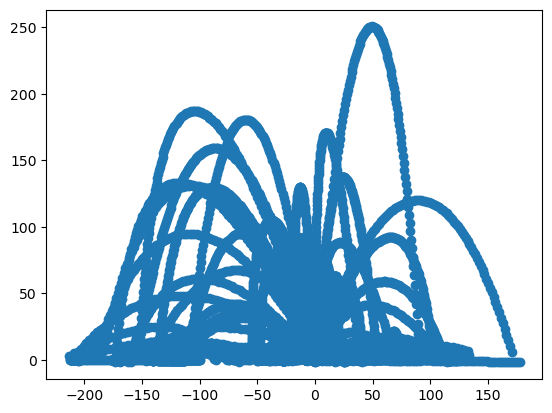

In [71]:
test = ball_pos[ball_pos['play_id'] == 2]
plt.scatter(test['ball_position_x'].values, test['ball_position_z'].values)
plt.show()